### Imports and Load Dataset 
Starting point - we take the existing preprocessed dataset OMdb_merged.csv

In [93]:
import pandas as pd
import numpy as np
import cpi
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [90]:
pd.set_option('max_columns', None)

In [3]:
OMdb = pd.read_csv('data/OMdb_merged.csv')

In [4]:
OMdb.head(2)

,Actors,Awards,BoxOffice,Country,DVD,Director,Genre,IMdb_ID,IMdb_score,Language,Metascore,Plot,Production,RT_score,Rated,Released,Runtime,TMdb_id,Title,Type,Website,Year,actor_1,actor_2,awards,bo_year,bo_year_rank,director_1,director_2,domestic-gross,domestic-pct,imdbVotes,itunes_id,logBoxOffice,mojo_title,nominations,num_actor,num_director,num_genre,num_lang,oscar_noms,oscar_wins,overseas-gross,overseas-pct,search_strs,studio,titles,worldwide-gross,years,Writer 1,Writer 2,Writer 3,Writer 4,budget,Cast 1,Cast 2,Cast 3,Cast 4,Cast 5,Cast 6
0,"Neel Sethi, Bill Murray, Ben Kingsley, Idris Elba",Won 1 Oscar. Another 31 wins & 54 nominations.,363995937.0,"UK, USA",30 Aug 2016,Jon Favreau,"Adventure, Drama, Family, Fantasy",tt3040964,74.0,English,77.0,After a threat from the tiger Shere Khan force...,Walt Disney Pictures,95.0,PG,15 Apr 2016,106.0,"[278927, 183407, 534412, 399014]",The Jungle Book,movie,http://movies.disney.com/the-jungle-book-2016,2016,Neel Sethi,Bill Murray,31.0,2016.0,5.0,Jon Favreau,0,364000000.0,37.7,231929.0,1098066757,8.561097,The Jungle Book 2016,54.0,4,1,4,1.0,0.0,1.0,602500000.0,62.3,The+Jungle+Book+2016,BV,The Jungle Book (2016),966600000.0,2016,Justin Marks,Writer Not Available,Writer Not Available,Writer Not Available,175000000.0,Neel Sethi,Neel Sethi,Bill Murray,Ben Kingsley,Idris Elba,Lupita Nyong'o
1,"Neel Sethi, Bill Murray, Ben Kingsley, Idris Elba",Won 1 Oscar. Another 31 wins & 54 nominations.,363995937.0,"UK, USA",30 Aug 2016,Jon Favreau,"Adventure, Drama, Family, Fantasy",tt3040964,74.0,English,77.0,After a threat from the tiger Shere Khan force...,Walt Disney Pictures,95.0,PG,15 Apr 2016,106.0,"[278927, 183407, 534412, 399014]",The Jungle Book,movie,http://movies.disney.com/the-jungle-book-2016,2016,Neel Sethi,Bill Murray,31.0,2016.0,5.0,Jon Favreau,0,364000000.0,37.7,231929.0,1098066757,8.561097,The Jungle Book 2016,54.0,4,1,4,1.0,0.0,1.0,602500000.0,62.3,The+Jungle+Book+2016,BV,The Jungle Book (2016),966600000.0,2016,Justin Marks,Writer Not Available,Writer Not Available,Writer Not Available,175000000.0,Bruce Reitherman,Louis Prima,Sterling Holloway,J. Pat O'Malley,Darleen Carr,Phil Harris


1. We need to adjust the worldwide-gross and budget column values for inflation. Here is a how-to:
https://medium.com/analytics-vidhya/adjusting-for-inflation-when-analysing-historical-dat a-with-python-9d69a8dcbc27
Let’s just adjust all of the movie dollars in the “budget” and “worldwide-gross” columns to today’s present value in dollars (so 2020, 2019 doesn’t matter just something recent). Please replace those column values with the adjusted value in dollars. So we keep the original columns.

In [5]:
cpi.update()

In [6]:
def inflate_column(data, column): 
    return data.apply(lambda x:cpi.inflate(x[column], x.Year), axis = 1)

In [7]:
OMdb['real_budget'] = inflate_column(OMdb, 'budget')
OMdb['real_revenue'] = inflate_column(OMdb, 'worldwide-gross')

ref: https://medium.com/analytics-vidhya/adjusting-for-inflation-when-analysing-historical-data-with-python-9d69a8dcbc27

2. Since movie runtime is in units of minutes (100 minutes) and revenue/budget is in millions of dollars ($100M), we will need to normalize the data in the dataset. Please normalize all data columns in the dataset.

In [11]:
ss = StandardScaler()
OMdb_scaled = ss.fit_transform(OMdb._get_numeric_data())

In [24]:
norm = pd.DataFrame(OMdb_scaled, columns = OMdb._get_numeric_data().columns)

In [31]:
norm.head(2)

,BoxOffice,IMdb_score,Metascore,RT_score,Runtime,Year,awards,bo_year,bo_year_rank,domestic-gross,domestic-pct,imdbVotes,itunes_id,logBoxOffice,nominations,num_actor,num_director,num_genre,num_lang,oscar_noms,oscar_wins,overseas-gross,overseas-pct,worldwide-gross,years,budget,real_budget,real_revenue
0,2.070799,0.534258,1.038948,1.271646,-0.64298,1.024943,0.477102,1.16147,-0.698268,1.706698,-0.220864,-0.341152,1.371829,0.738319,0.500459,0.049568,-0.229738,0.368824,-0.746692,-0.361542,0.30406,1.342722,0.220864,1.506129,1.015484,1.057998,0.773345,1.0645
1,2.070799,0.534258,1.038948,1.271646,-0.64298,1.024943,0.477102,1.16147,-0.698268,1.706698,-0.220864,-0.341152,1.371829,0.738319,0.500459,0.049568,-0.229738,0.368824,-0.746692,-0.361542,0.30406,1.342722,0.220864,1.506129,1.015484,1.057998,0.773345,1.0645


In [27]:
def replace_norms(OMdb_df, norm_df):
    cols = norm_df.columns
    for col in cols: 
        OMdb_df[col] = norm_df[col]

In [28]:
replace_norms(OMdb, norm)

In [32]:
OMdb.head(2)

,Actors,Awards,BoxOffice,Country,DVD,Director,Genre,IMdb_ID,IMdb_score,Language,Metascore,Plot,Production,RT_score,Rated,Released,Runtime,TMdb_id,Title,Type,Website,Year,actor_1,actor_2,awards,bo_year,bo_year_rank,director_1,director_2,domestic-gross,domestic-pct,imdbVotes,itunes_id,logBoxOffice,mojo_title,nominations,num_actor,num_director,num_genre,num_lang,oscar_noms,oscar_wins,overseas-gross,overseas-pct,search_strs,studio,titles,worldwide-gross,years,Writer 1,Writer 2,Writer 3,Writer 4,budget,Cast 1,Cast 2,Cast 3,Cast 4,Cast 5,Cast 6,real_budget,real_revenue
0,"Neel Sethi, Bill Murray, Ben Kingsley, Idris Elba",Won 1 Oscar. Another 31 wins & 54 nominations.,2.070799,"UK, USA",30 Aug 2016,Jon Favreau,"Adventure, Drama, Family, Fantasy",tt3040964,0.534258,English,1.038948,After a threat from the tiger Shere Khan force...,Walt Disney Pictures,1.271646,PG,15 Apr 2016,-0.64298,"[278927, 183407, 534412, 399014]",The Jungle Book,movie,http://movies.disney.com/the-jungle-book-2016,1.024943,Neel Sethi,Bill Murray,0.477102,1.16147,-0.698268,Jon Favreau,0,1.706698,-0.220864,-0.341152,1.371829,0.738319,The Jungle Book 2016,0.500459,0.049568,-0.229738,0.368824,-0.746692,-0.361542,0.30406,1.342722,0.220864,The+Jungle+Book+2016,BV,The Jungle Book (2016),1.506129,1.015484,Justin Marks,Writer Not Available,Writer Not Available,Writer Not Available,1.057998,Neel Sethi,Neel Sethi,Bill Murray,Ben Kingsley,Idris Elba,Lupita Nyong'o,0.773345,1.0645
1,"Neel Sethi, Bill Murray, Ben Kingsley, Idris Elba",Won 1 Oscar. Another 31 wins & 54 nominations.,2.070799,"UK, USA",30 Aug 2016,Jon Favreau,"Adventure, Drama, Family, Fantasy",tt3040964,0.534258,English,1.038948,After a threat from the tiger Shere Khan force...,Walt Disney Pictures,1.271646,PG,15 Apr 2016,-0.64298,"[278927, 183407, 534412, 399014]",The Jungle Book,movie,http://movies.disney.com/the-jungle-book-2016,1.024943,Neel Sethi,Bill Murray,0.477102,1.16147,-0.698268,Jon Favreau,0,1.706698,-0.220864,-0.341152,1.371829,0.738319,The Jungle Book 2016,0.500459,0.049568,-0.229738,0.368824,-0.746692,-0.361542,0.30406,1.342722,0.220864,The+Jungle+Book+2016,BV,The Jungle Book (2016),1.506129,1.015484,Justin Marks,Writer Not Available,Writer Not Available,Writer Not Available,1.057998,Bruce Reitherman,Louis Prima,Sterling Holloway,J. Pat O'Malley,Darleen Carr,Phil Harris,0.773345,1.0645


3. We need to run onehotencoding again on the normalized and adjusted dataset >> Please output copy of the dataset (.csv) with only the onehotencoding

In [33]:
cat_cols = np.array(pd.DataFrame(OMdb.dtypes[OMdb.dtypes == 'object']).index)

In [34]:
ohe = OneHotEncoder(drop = 'first')
ohe_array = ohe.fit_transform(OMdb[cat_cols]).toarray()
ohe_OMdb = pd.DataFrame(ohe_array, index = OMdb.index, columns = ohe.get_feature_names())

In [36]:
ohe_OMdb.to_csv('data/ohe_cols.csv', index = False)

In [94]:
OMdb_drop_col = OMdb.drop(columns = cat_cols)

In [95]:
OMdb_ohed = pd.concat([OMdb_drop_col, ohe_OMdb], axis = 1)

In [98]:
OMdb_ohed.head()

,BoxOffice,IMdb_score,Metascore,RT_score,Runtime,Year,awards,bo_year,bo_year_rank,domestic-gross,domestic-pct,imdbVotes,itunes_id,logBoxOffice,nominations,num_actor,num_director,num_genre,num_lang,oscar_noms,oscar_wins,overseas-gross,overseas-pct,worldwide-gross,years,budget,real_budget,real_revenue,genre_1,month,pct_return,"x0_Aaron Paul, Dominic Cooper, Imogen Poots, Kid Cudi","x0_Aaron Taylor-Johnson, Chloë Grace Moretz, Morris Chestnut, Claudia Lee","x0_Adam Sandler, Kevin James, Michelle Monaghan, Peter Dinklage","x0_Adewale Akinnuoye-Agbaje, Christopher Eccleston, Grégory Fitoussi, Joseph Gordon-Levitt","x0_Adrien Brody, Topher Grace, Alice Braga, Walton Goggins","x0_Alan Howard, Noel Appleby, Sean Astin, Sala Baker","x0_Alberto Reyes, Julio Oscar Mechoso, Gustavo Sánchez Parra, Adrian Alonso","x0_Alexander Skarsgård, Rory J. Saper, Christian Stevens, Christoph Waltz","x0_Andrew Garfield, Emma Stone, Jamie Foxx, Dane DeHaan","x0_Andrew Garfield, Emma Stone, Rhys Ifans, Denis Leary","x0_Andy Serkis, Jason Clarke, Gary Oldman, Keri Russell","x0_Andy Serkis, Karin Konoval, Terry Notary, Richard Ridings","x0_Angelina Jolie, Elle Fanning, Sharlto Copley, Lesley Manville","x0_Arnold Schwarzenegger, George Clooney, Chris O'Donnell, Uma Thurman","x0_Arnold Schwarzenegger, Jason Clarke, Emilia Clarke, Jai Courtney","x0_Arnold Schwarzenegger, Linda Hamilton, Edward Furlong, Robert Patrick","x0_Ashleigh Anne Aitkenhead, Christopher Bird, Samuel Dent Chapman, Kelly Jackson","x0_Aziz Ansari, Joy Behar, Christopher Campbell, Alain Chabat","x0_Ben Affleck, Henry Cavill, Amy Adams, Jesse Eisenberg","x0_Ben Affleck, Josh Hartnett, Kate Beckinsale, William Lee Scott","x0_Ben Barnes, Georgie Henley, Skandar Keynes, William Moseley","x0_Ben Kingsley, Sacha Baron Cohen, Asa Butterfield, Chloë Grace Moretz","x0_Benicio Del Toro, Dennis Farina, Vinnie Jones, Brad Pitt","x0_Benjamin Walker, Dominic Cooper, Anthony Mackie, Mary Elizabeth Winstead","x0_Bill Nighy, Emily Blunt, Rupert Grint, Rupert Everett","x0_Bill Pullman, Bridget Fonda, Oliver Platt, Brendan Gleeson","x0_Billy Crystal, John Goodman, Steve Buscemi, Helen Mirren","x0_Blake Anderson, Aziz Ansari, Allison Bills, Jim Conroy","x0_Brad Pitt, Angelina Jolie, Vince Vaughn, Adam Brody","x0_Brad Pitt, Catherine Zeta-Jones, George Clooney, Ed Kross","x0_Brad Pitt, Mary-Louise Parker, Brooklynn Proulx, Dustin Bollinger","x0_Brad Pitt, Mireille Enos, Daniella Kertesz, James Badge Dale","x0_Brad Pitt, Mélanie Laurent, Christoph Waltz, Eli Roth","x0_Brad Pitt, Shia LaBeouf, Logan Lerman, Michael Peña","x0_Bradley Cooper, Kyle Gallner, Cole Konis, Ben Reed","x0_Brendan Fraser, Josh Hutcherson, Anita Briem, Seth Meyers","x0_Brenton Thwaites, John Samaha, Courtney Eaton, Nikolaj Coster-Waldau","x0_Bruce Allpress, Sean Astin, John Bach, Sala Baker","x0_Bruce Campbell, Embeth Davidtz, Marcus Gilbert, Ian Abercrombie","x0_Bruce Willis, Bonnie Bedelia, Reginald VelJohnson, Paul Gleason","x0_Bruce Willis, Bonnie Bedelia, William Atherton, Reginald VelJohnson","x0_Bruce Willis, Jai Courtney, Sebastian Koch, Mary Elizabeth Winstead","x0_Bruce Willis, John Malkovich, Mary-Louise Parker, Helen Mirren","x0_Bruce Willis, Mary-Louise Parker, Heidi von Palleske, Karl Urban","x0_Casper Van Dien, Dina Meyer, Denise Richards, Jake Busey","x0_Channing Tatum, Jamie Foxx, Maggie Gyllenhaal, Jason Clarke","x0_Charlie Hunnam, Diego Klattenhoff, Idris Elba, Rinko Kikuchi","x0_Chevy Chase, Beverly D'Angelo, Imogene Coca, Randy Quaid","x0_Chloë Grace Moretz, Matthew Zuk, Gabriela Lopez, Bailey Anne Borders","x0_Chris Evans, Hayley Atwell, Sebastian Stan, Tommy Lee Jones","x0_Chris Evans, Robert Downey Jr., Scarlett Johansson, Sebastian Stan","x0_Chris Evans, Samuel L. Jackson, Scarlett Johansson, Robert Redford","x0_Chris Hemsworth, Leehom Wang, Wei Tang, Viola Davis","x0_Chris Hemsworth, Natalie Portman, Tom Hiddleston, Anthony Hopkins","x0_Chris Pine, Alec Baldwin, Jude Law, Isla Fisher","x0_Chris Pine, Keira Knightle

4. We need to rerun all the graphs again with this updated dataset >> Please also output copy of the image files for these graphs

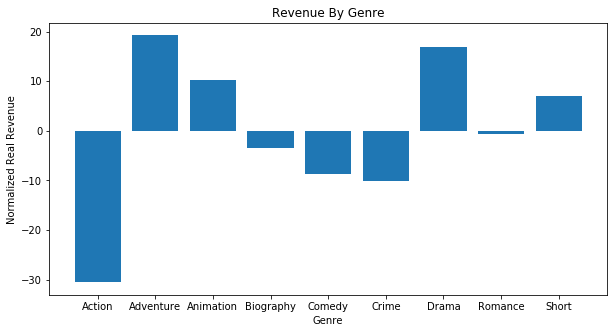

In [47]:
'''
1. Graph #1 to Plot revenue by genre. Revenue comes from “worldwide-gross” and “Genre” in OMDb_mojo_clean.csv. 
Now some of the genre categories are multiples, 
you can count each combination as a unique category OR just pick one category in the list as the genre. 
So if a data point has Genre = Action, Comedy, Animation, we can pick “Action” or “Comedy” 
or “Animation” as its genre
'''

OMdb['genre_1'] = [i.split(',')[0] for i in OMdb['Genre'] ]
genre_revenue_df= pd.DataFrame(OMdb.groupby(['genre_1']).sum()['real_revenue'])
plt.figure(figsize = (10, 5))
plt.bar(genre_revenue_df.index, genre_revenue_df['real_revenue'])
plt.title('Revenue By Genre')
plt.xlabel('Genre')
plt.ylabel('Normalized Real Revenue')
plt.savefig('images/real_revenue_by_genre.png');

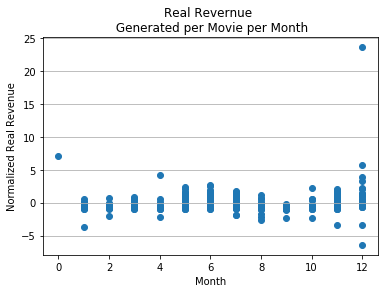

In [64]:
'''
2. Take all the movies and bin them by the month that they are released. 
The year of release we do not care about. Then plot them against the revenue generated per movie.
So y-axis is revenue and x-axis is the months of the year.
And each month of the year contains each movie.
'''
month = []
for data in OMdb['Released']:
    if data != '0':
        month.append(pd.to_datetime(data).month)
    else:
        month.append(0)
        
OMdb['month'] = month
month_revenue_df =pd.DataFrame(OMdb.groupby(by = ['month', 'Title']).sum()['real_revenue'])
month_revenue_df.reset_index(inplace = True)
plt.scatter(month_revenue_df['month'], month_revenue_df['real_revenue'])
plt.title('Real Revernue \n Generated per Movie per Month')
plt.xlabel('Month')
plt.grid(True, which='major', axis='y')
plt.ylabel('Normalized Real Revenue')
plt.savefig('images/real_revenue_per_movie_per_month.png');

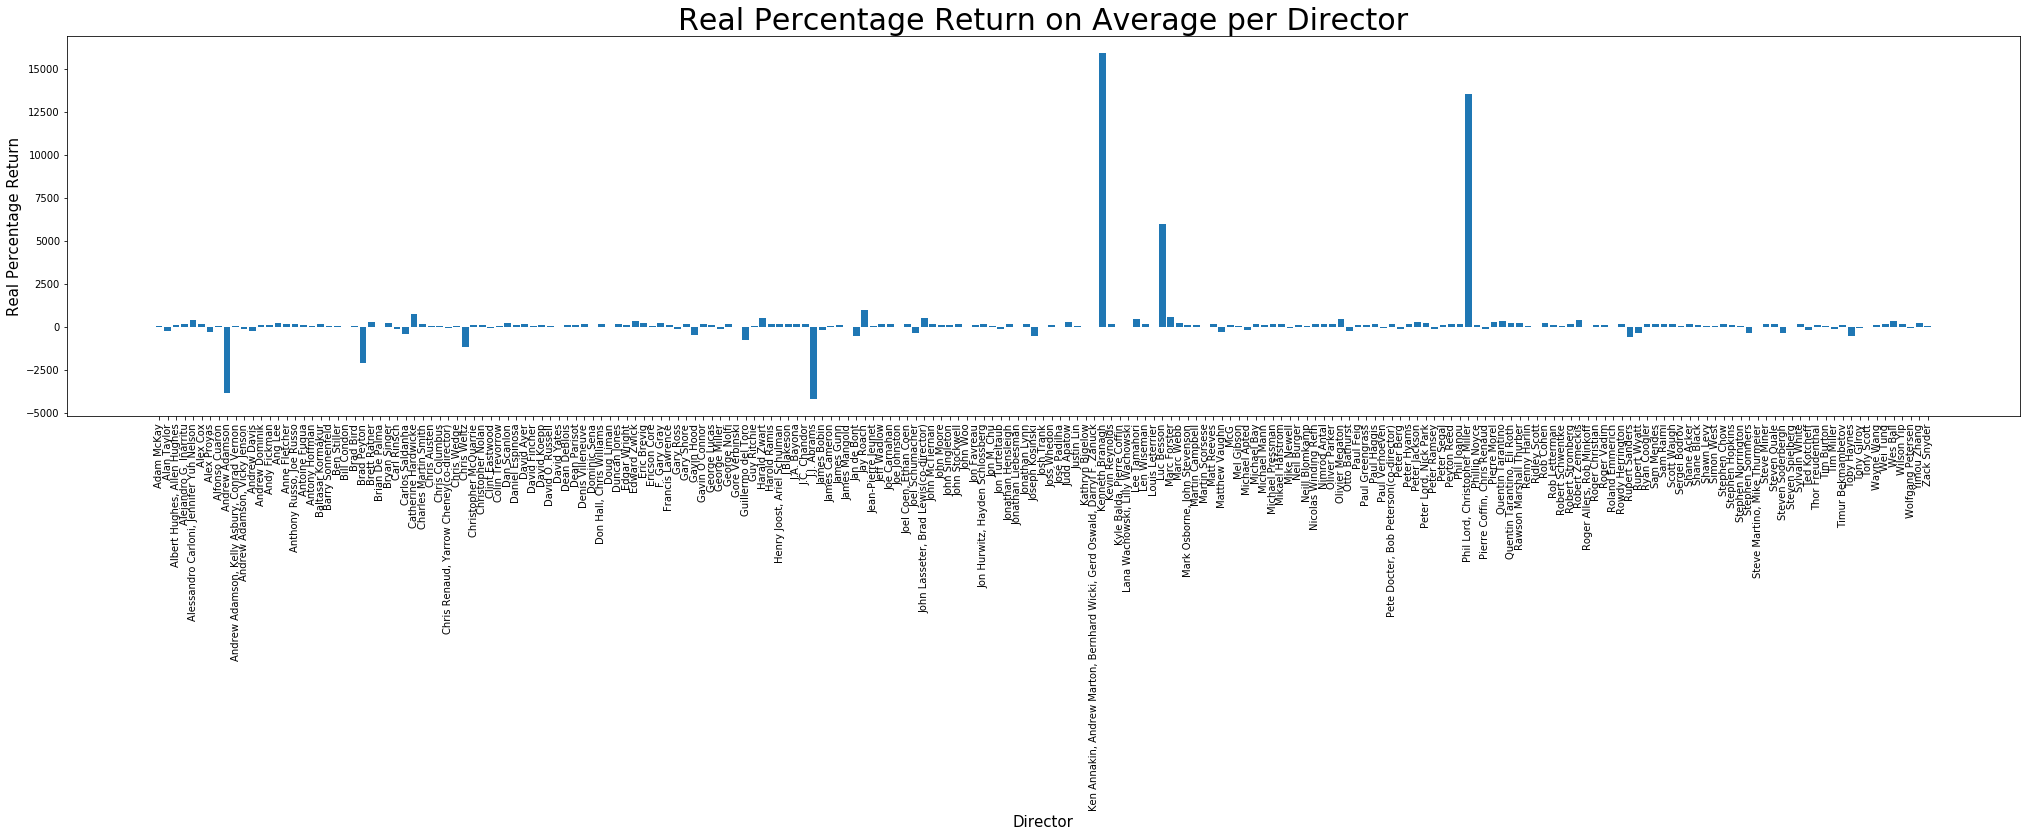

In [77]:
'''
3. For the data points that have budget, revenue (Worldwide-gross) and director (pick director_1) 
filled in the merged OMDb_mojo_clean.csv., can we calculate the percentage return on a movie? 
So it will be (budget/revenue) * 100% equals percentage return on a movie. 
I want to bin the movies by the director, so that we see which director has the highest percentage return on average. 
If you think a scatterplot would work better or some other chart, go ahead and do it.
'''
OMdb['pct_return'] = OMdb['real_budget']/OMdb['real_revenue']*100
revenue_director_df = pd.DataFrame(OMdb.groupby(by=['Director']).mean()['pct_return'])
plt.figure(figsize = (35,7))
plt.bar(revenue_director_df.index, revenue_director_df['pct_return'])
plt.title('Real Percentage Return on Average per Director', fontsize = 30)
plt.xlabel('Director', fontsize = 15)
plt.ylabel('Real Percentage Return', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('images/real_percentage_return_per_director.png');

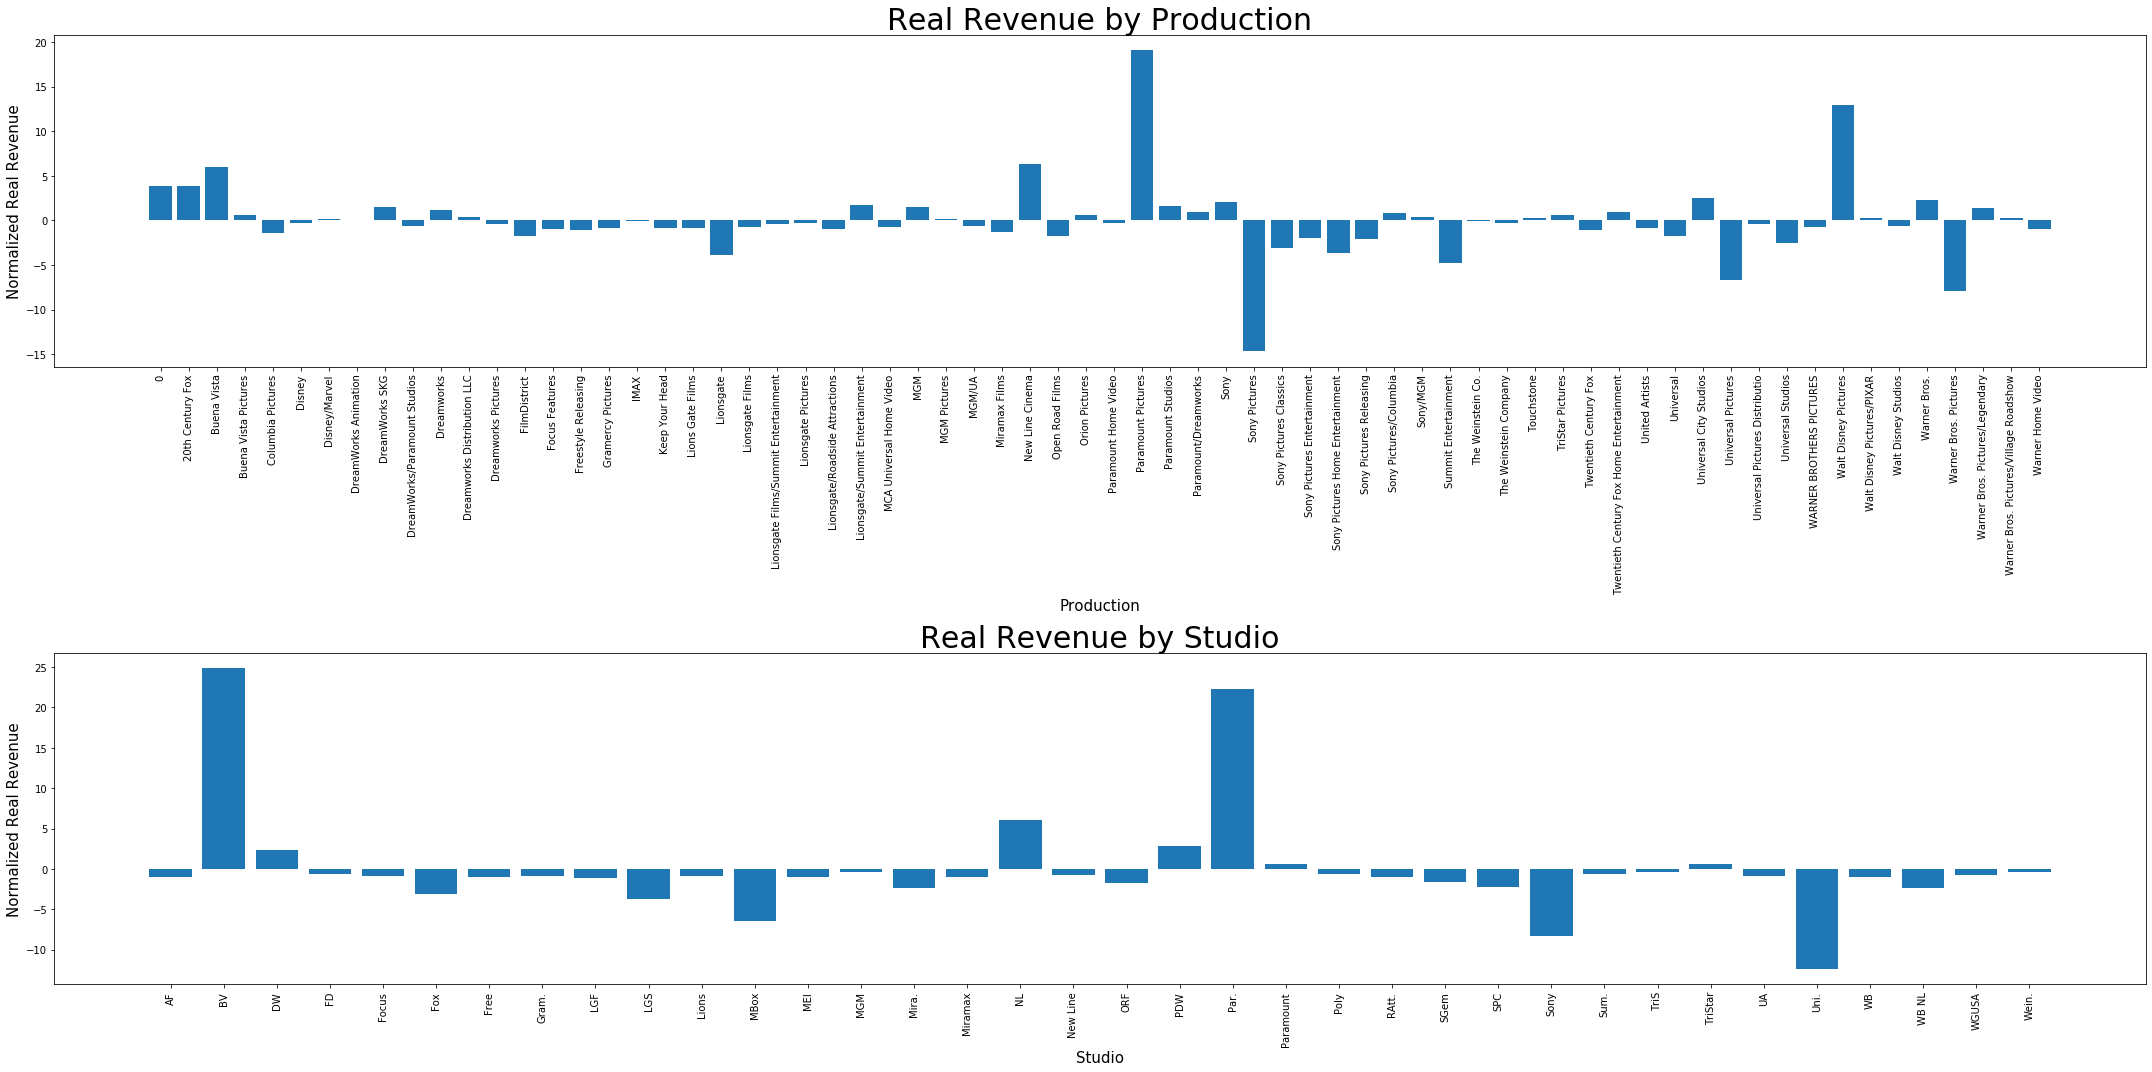

In [80]:
# a. Worldwide-gross to production studio
wwg_production_df = pd.DataFrame(OMdb.groupby(by=['Production']).sum()['real_revenue'])
wwg_studio_df = pd.DataFrame(OMdb.groupby(by=['studio']).sum()['real_revenue'])

plt.figure(figsize = (30,15))
ax1 = plt.subplot(2,1,1)
ax1.set_title('Real Revenue by Production', fontsize = 30)
ax1.bar(wwg_production_df.index, wwg_production_df['real_revenue'])
ax1.set_xlabel('Production', fontsize = 15)
ax1.set_xticklabels(wwg_production_df.index, rotation = 90)
ax1.set_ylabel('Normalized Real Revenue', fontsize = 15)

ax2 = plt.subplot(2,1,2)
ax2.set_title('Real Revenue by Studio', fontsize = 30)
ax2.bar(wwg_studio_df.index, wwg_studio_df['real_revenue'])
ax2.set_xlabel('Studio', fontsize = 15)
ax2.set_xticklabels(wwg_studio_df.index, rotation = 90)
ax2.set_ylabel('Normalized Real Revenue', fontsize = 15)

plt.tight_layout()
plt.savefig('images/real revenue to production vs. studio.png')

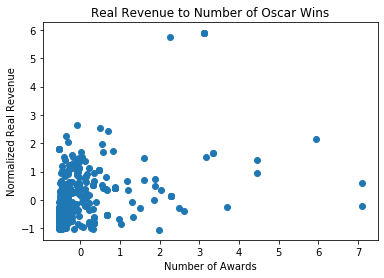

In [83]:
#d. Worldwide-gross to total # awards won
plt.scatter(OMdb['awards'], OMdb['real_revenue'])
plt.title('Real Revenue to Number of Oscar Wins')
plt.xlabel('Number of Awards')
plt.ylabel('Normalized Real Revenue')
plt.savefig('images/Real Revenue to Number of Oscar Wins.png');

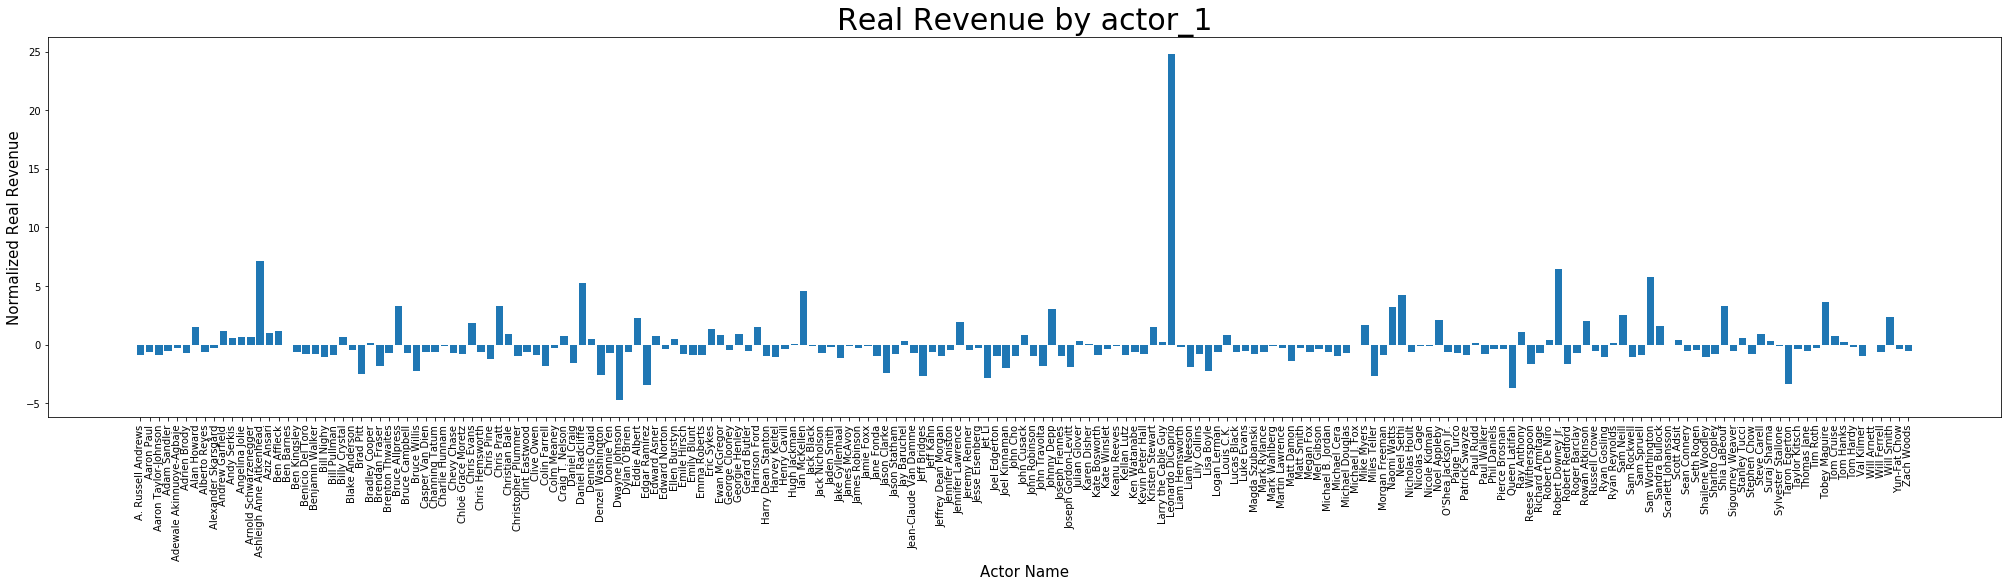

In [85]:
# Real Revenue to actor_1
wwg_actor1_df = pd.DataFrame(OMdb.groupby(by=['actor_1']).sum()['real_revenue'])
plt.figure(figsize = (35,7))
plt.bar(wwg_actor1_df.index, wwg_actor1_df['real_revenue'])
plt.title('Real Revenue by actor_1', fontsize = 30)
plt.xlabel('Actor Name', fontsize = 15)
plt.ylabel('Normalized Real Revenue', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('images/Real Revenue to actor_1.png');

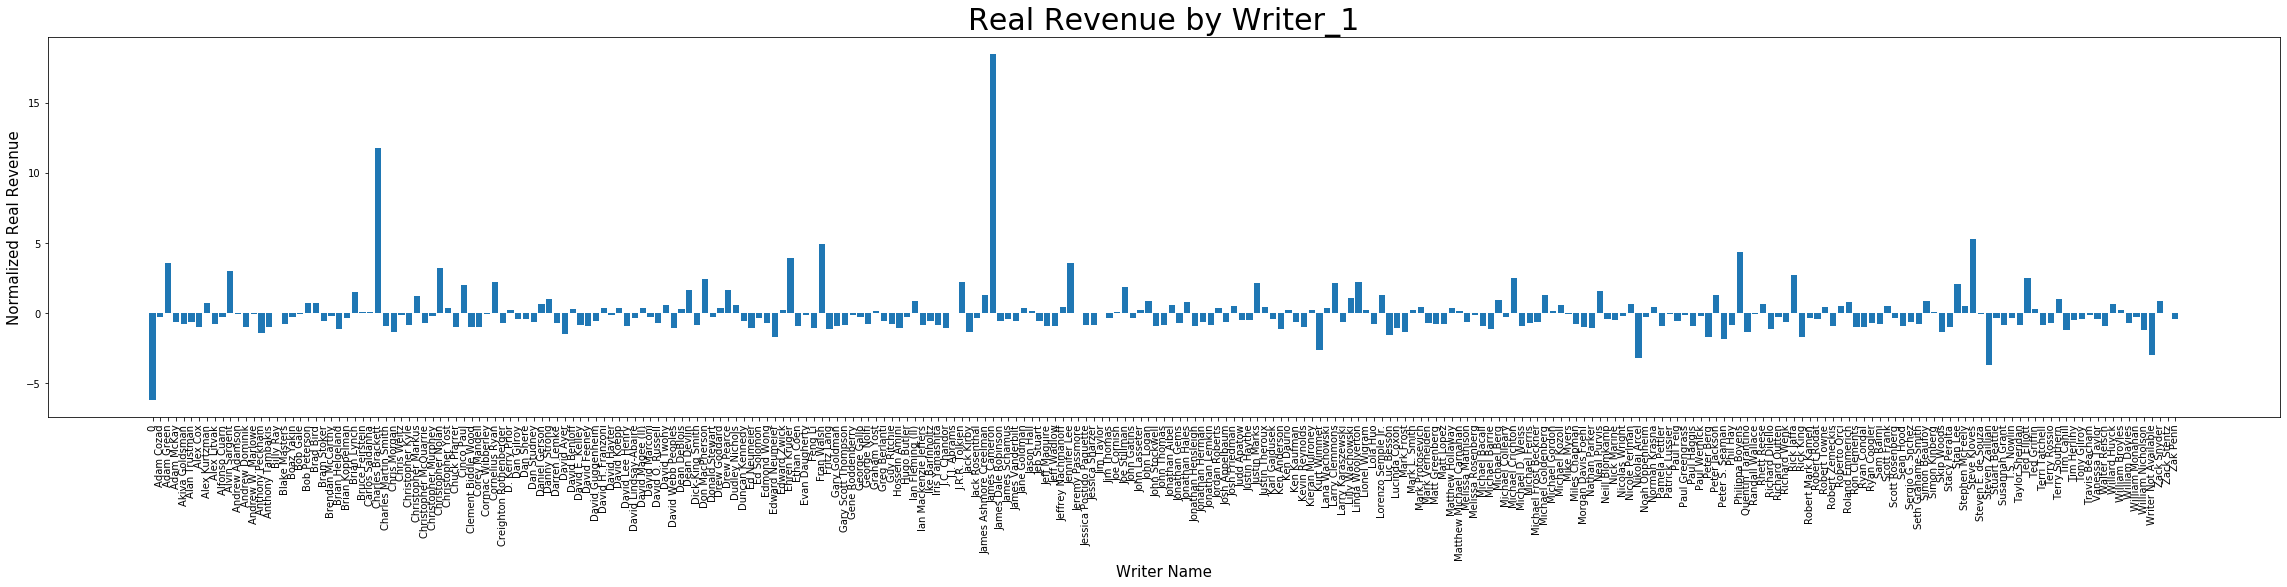

In [88]:
# Real Revenue to writer_1
wwg_writer_df = pd.DataFrame(OMdb.groupby(by=['Writer 1']).sum()['real_revenue'])
plt.figure(figsize = (40,7))
plt.bar(wwg_writer_df.index, wwg_writer_df['real_revenue'])
plt.title('Real Revenue by Writer_1', fontsize = 30)
plt.xlabel('Writer Name', fontsize = 15)
plt.ylabel('Normalized Real Revenue', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('images/Real Revenue to writer_1.png');

### Modeling

A) FeatureSelection/DimensionalityReduction:
We use SelectKBest to determine the highest impact features or combination of. 
>> Please provide output that indicates the impact on prediction accuracy of each
feature
>> Please provide output that indicates the subset of features that have highest impact
>> Output any other information this method can tell us in terms of which features matter
the most
Pick the subset determined with highest prediction accuracy to feed to the prediction
models listed in Part D
